In [1]:
errors_sq = []
percent_Error = []

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [110]:
df = pd.read_csv('tickers-actual/XRX.csv')
# df = df['close']
# df

In [113]:
# calculate simple moving average
def sma(data, window):
    if len(data) < window:
            return None
    return sum(data[-window:]) / float(window)


# calculate exponential moving average, with time period 10
def ema_10(data, window = 10):
    if len(data) < 2 * window:
#         raise ValueError("data is too short")
        return 0
    c = 2.0 / (window + 1)
    current_ema = sma(data[-window*2:-window], window)
    for value in data[-window:]:
        current_ema = (c * value) + ((1 - c) * current_ema)
    return current_ema

# calculate exponential moving average, with time period 20
def ema_20(data, window = 20):
    if len(data) < 2 * window:
#         raise ValueError("data is too short")
        return 0
    c = 2.0 / (window + 1)
    current_ema = sma(data[-window*2:-window], window)
    for value in data[-window:]:
        current_ema = (c * value) + ((1 - c) * current_ema)
    return current_ema

today = 90

train_y = df['close'][:today]
valid_y = df['close'][today]

e10 = ema_10(train_y)
e20 = ema_20(train_y)

# print('e10_closing: ', e10, '-- e20_closing: ', e20)
# print('[actual closing: ', valid_y,"]")

# print('e10 error: ', e10-valid_y, '-- e20 error: ', e20-valid_y)

errors_sq.append(pow(e10 - valid_y,2))

pe = abs(valid_y - e10)/valid_y
percent_Error.append(pe)
# percent_Error

# errors_sq

In [112]:
total = 0 
for x in errors_sq:
    total += x
# total error squared
print(total)

totalP = 0
for x in percent_Error:
    totalP += x
print(totalP/len(percent_Error))

# if e10 > e20:
#     print('Good to Buy')
# elif e10 < e20:
#     print('Good to Sell')
# elif e10 == e20:
#     print('Hold it')

104.601663597
0.0235859262731


/Users/japjot/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  """
/Users/japjot/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  


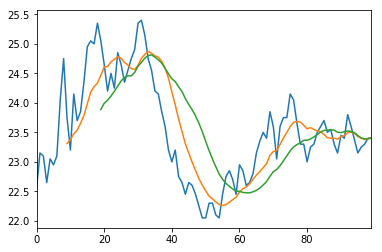

In [67]:
%matplotlib inline

# look at rough data trend (set 10 and 20 to what you set ema windows)
df['close'].plot()
pd.rolling_mean(df['close'], 10).plot()
pd.rolling_mean(df['close'], 20).plot()